<a href="https://colab.research.google.com/github/hsnbnaa/deep-learning-is-easy/blob/main/Hands-on%20Machine%20Learning%20with%20Scikit-Learn%2C%20Keras%20%26%20TensorFlow/Chapter%2014/14_deep_computer_vision_with_cnns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load dan pra-pemrosesan data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Model
model = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=7, activation="relu", padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(128, kernel_size=3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, kernel_size=3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

# Kompilasi model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  # Karena label-nya belum one-hot
    metrics=["accuracy"]
)

# Training model
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)

# Evaluasi
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.6159 - loss: 1.0539 - val_accuracy: 0.8565 - val_loss: 0.3751
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8371 - loss: 0.4624 - val_accuracy: 0.8877 - val_loss: 0.3257
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8657 - loss: 0.3902 - val_accuracy: 0.8967 - val_loss: 0.2918
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8826 - loss: 0.3437 - val_accuracy: 0.9082 - val_loss: 0.2707
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8912 - loss: 0.3191 - val_accuracy: 0.9028 - val_loss: 0.2590
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8956 - loss: 0.2994
Test accuracy: 0.8987


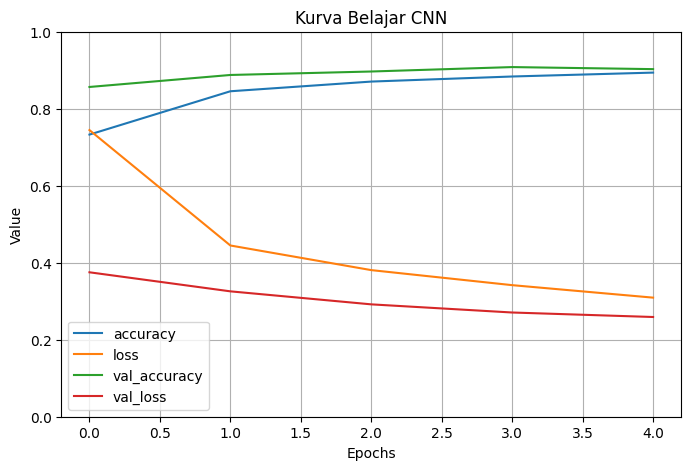

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Membuat DataFrame dari history pelatihan
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Menetapkan batas sumbu y antara 0 dan 1
plt.title("Kurva Belajar CNN")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_24']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


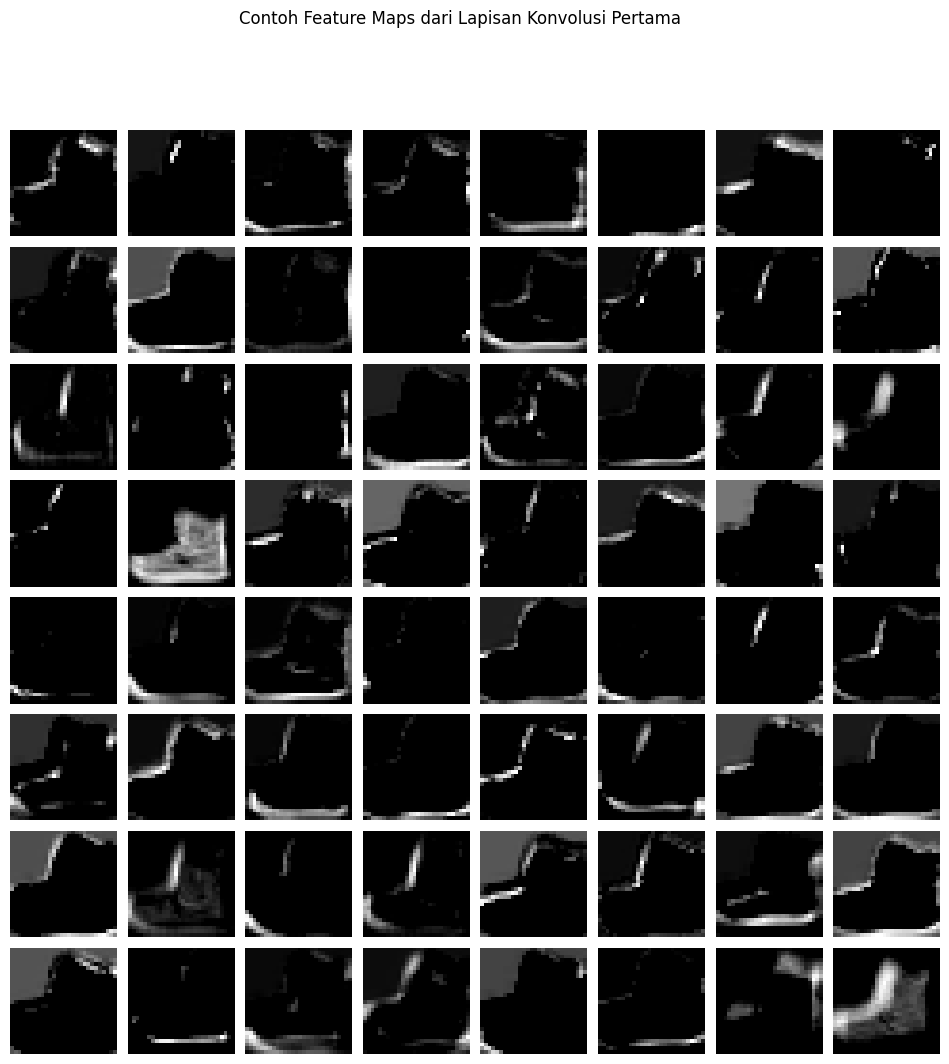

In [6]:
import numpy as np

# Membuat model baru yang outputnya adalah feature map dari lapisan pertama
conv_layer = model.layers[0]
feature_map_model = keras.Model(inputs=model.inputs, outputs=conv_layer.output)

# Mengambil satu contoh gambar
sample_image = x_train[0:1]
feature_maps = feature_map_model.predict(sample_image)

# Plotting feature maps
n_feature_maps = feature_maps.shape[-1]
n_cols = 8
n_rows = (n_feature_maps + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        if index < n_feature_maps:
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(feature_maps[0, :, :, index], cmap="gray")
            plt.axis("off")

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.suptitle("Contoh Feature Maps dari Lapisan Konvolusi Pertama")
plt.show()